In [7]:
#load all csv files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import seaborn as sns



In [8]:

#load all csv files in the folder
path = '.'

files = os.listdir(path)
files = [file for file in files if file.endswith('.csv') and file.startswith('results_')]

dfs = []
names = []
for file in files:  
    df = pd.read_csv(file)
    name = file[len('results_'):-len('.csv')]
    # name = str(int(name[0])+1)+'>'+str(int(name[-1])+1)
    dfs += [df.mean(axis=0)]
    names += [name]

#concatenate all dataframes
df = pd.concat(dfs, ignore_index=True, axis=1)
df.columns = names

df = df.T

print(df)


      Parameter-based Transfer MSE  Instance-based Transfer MSE  IEEE 738 MSE  \
2_10                      0.614667                     2.597667      1.740667   
4_2                       1.245000                     0.865667      0.750667   
3_0                       2.112000                     0.879000      0.544000   
6_0                       2.743667                     3.667667      0.544000   
4_5                       1.773000                     0.887333      0.737333   
...                            ...                          ...           ...   
1_2                       1.364000                     2.037667      0.750667   
6_10                      0.824000                     2.143667      1.740667   
3_8                       1.178333                     9.787000      0.858000   
2_6                       1.667667                     7.166000      0.707333   
5_6                       0.799667                     9.315667      0.707333   

      Source Only MSE  Targ

In [9]:
expected = []
for i in range(11):
    for j in range(11): 
        if i != j: 
            expected.append(str(i)+'_'+str(j))
missing = [x for x in expected if x not in df.index]
print(missing)
if len(missing)>0:
    missing = pd.Series(missing).str.split('_', expand=True)
    missing = missing.astype(int)
    missing.sort_values(by=[1,0])

['9_0', '9_1', '9_2', '9_3', '9_4', '9_5', '9_6', '9_7', '10_0', '10_1', '10_2', '10_3', '10_4', '10_5', '10_6', '10_7']


In [65]:
df.to_csv('aggregate_results_no_tuning.csv', index=True)

In [66]:
df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]
df_counts['wins'] = df_counts['wins'].astype(int)

In [67]:
df_counts

,Approach A,Approach B,wins
0,Parameter-based Transfer,Parameter-based Transfer,0
1,Parameter-based Transfer,Instance-based Transfer,103
2,Parameter-based Transfer,IEEE 738,60
3,Parameter-based Transfer,Source Only,89
4,Parameter-based Transfer,Target Only,104
5,Parameter-based Transfer,Source + Target (No Transfer),86
6,Instance-based Transfer,Parameter-based Transfer,7
7,Instance-based Transfer,Instance-based Transfer,0
8,Instance-based Transfer,IEEE 738,12
9,Instance-based Transfer,Source Only,9


<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

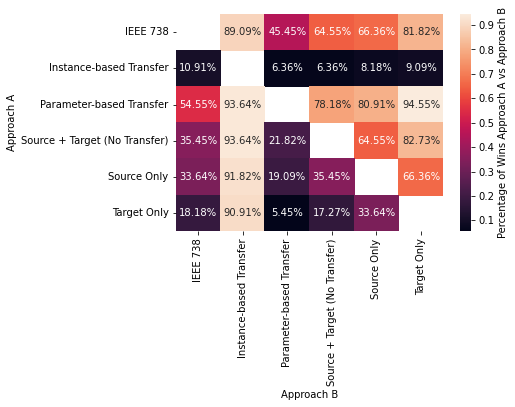

In [68]:


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


In [52]:
furthest_sensors = pd.read_csv('../furthest_sensors.csv')
closest_sensors = pd.read_csv('../closest_sensors.csv')
between_sensors = pd.read_csv('../between_sensors.csv')
maximum_sensors = pd.read_csv('../maximum_sensors.csv')
minimum_sensors = pd.read_csv('../minimum_sensors.csv')
median_sensors = pd.read_csv('../median_sensors.csv')

In [53]:
furthest_sensors_idx = (furthest_sensors['First Sensor'] - 1).astype('str')+'_'+(furthest_sensors['Second Sensor'] - 1).astype('str')
closest_sensors_idx = (closest_sensors['First Sensor'] - 1).astype('str')+'_'+(closest_sensors['Second Sensor'] - 1).astype('str')
between_sensors_idx = (between_sensors['First Sensor'] - 1).astype('str')+'_'+(between_sensors['Second Sensor'] - 1).astype('str')

maximum_sensors_idx = (maximum_sensors['First Sensor'] - 1).astype('str')+'_'+(maximum_sensors['Second Sensor'] - 1).astype('str')
minimum_sensors_idx = (minimum_sensors['First Sensor'] - 1).astype('str')+'_'+(minimum_sensors['Second Sensor'] - 1).astype('str')
median_sensors_idx = (median_sensors['First Sensor'] - 1).astype('str')+'_'+(median_sensors['Second Sensor'] - 1).astype('str')

furthest_sensors_idx = furthest_sensors_idx.tolist()
closest_sensors_idx = closest_sensors_idx.tolist()
between_sensors_idx = between_sensors_idx.tolist()
maximum_sensors_idx = maximum_sensors_idx.tolist()
minimum_sensors_idx = minimum_sensors_idx.tolist()
median_sensors_idx = median_sensors_idx.tolist()

to_delete = ['0_0', '1_1', '2_2', '3_3', '4_4', '5_5', '6_6', '7_7', '8_8', '9_9', '10_10']

closest_sensors_idx = [x for x in closest_sensors_idx if x not in to_delete]
furthest_sensors_idx = [x for x in furthest_sensors_idx if x not in to_delete]
between_sensors_idx = [x for x in between_sensors_idx if x not in to_delete]
maximum_sensors_idx = [x for x in maximum_sensors_idx if x not in to_delete]
minimum_sensors_idx = [x for x in minimum_sensors_idx if x not in to_delete]
median_sensors_idx = [x for x in median_sensors_idx if x not in to_delete]




In [55]:
for i in range(11):
    for j in range(11): 
        if i != j: 
            expected.append(str(i)+'_'+str(j))
missing = [x for x in expected if x not in df.index]
to_delete = missing

closest_sensors_idx = [x for x in closest_sensors_idx if x not in to_delete]
furthest_sensors_idx = [x for x in furthest_sensors_idx if x not in to_delete]
between_sensors_idx = [x for x in between_sensors_idx if x not in to_delete]
maximum_sensors_idx = [x for x in maximum_sensors_idx if x not in to_delete]
minimum_sensors_idx = [x for x in minimum_sensors_idx if x not in to_delete]
median_sensors_idx = [x for x in median_sensors_idx if x not in to_delete]

In [56]:
furthest_df = df.loc[furthest_sensors_idx]
closest_df = df.loc[closest_sensors_idx]
between_df = df.loc[between_sensors_idx]
maximum_df = df.loc[maximum_sensors_idx]
minimum_df = df.loc[minimum_sensors_idx]
median_df = df.loc[median_sensors_idx]

# Furthest DF

In [57]:
df = furthest_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


DataError: No numeric types to aggregate

# Between Sensors

In [58]:
df = between_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


DataError: No numeric types to aggregate

# Closest Sensors

In [59]:
df = closest_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


DataError: No numeric types to aggregate

# Minimum Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

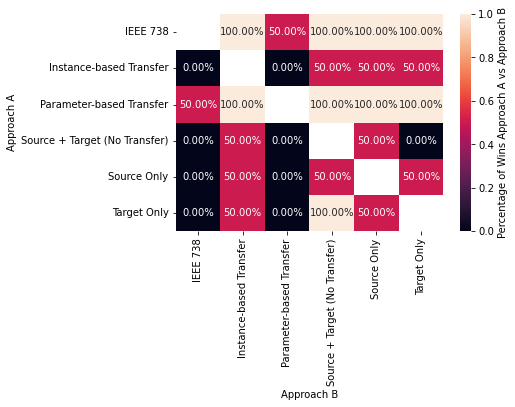

In [234]:
df = minimum_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


# Maximum Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

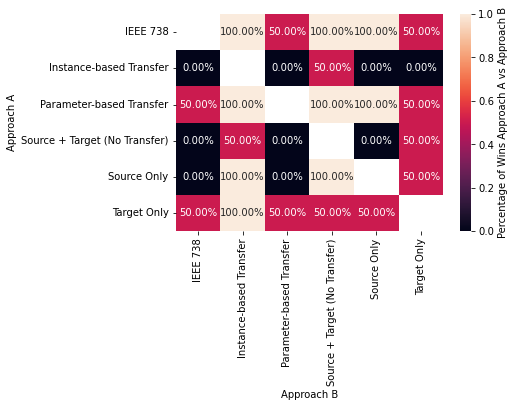

In [235]:
df = maximum_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})


# Median Sensors

<AxesSubplot:xlabel='Approach B', ylabel='Approach A'>

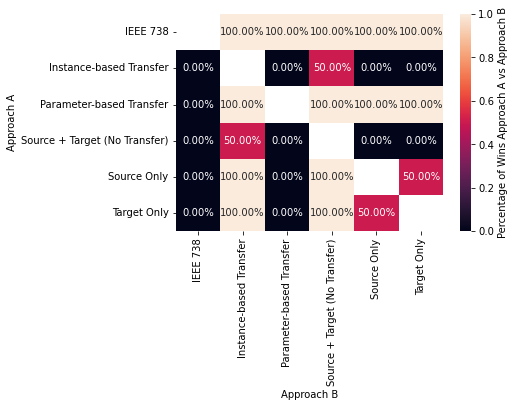

In [236]:
df = median_df

df_counts = pd.DataFrame(columns=['col_i', 'col_j', 'sum'])
for col_i in df.columns:
    for col_j in df.columns:
        current_sum =(df[col_i] < df[col_j]).sum()
        df_counts.loc[len(df_counts)] = [col_i, col_j, current_sum]


df_counts.rename(columns={'col_i':'Approach A', 'col_j':'Approach B', 'sum':'wins'}, inplace=True)

# remove 'MSE' at the end of column A values 
df_counts['Approach A'] = df_counts['Approach A'].str[:-4]
df_counts['Approach B'] = df_counts['Approach B'].str[:-4]


import seaborn as sns

pivot_table = df_counts.pivot_table(index='Approach A', columns='Approach B', values='wins')

# pivot_table_mask = np.tril(pivot_table)

pivot_table = pivot_table.astype(int)/len(df)

# Create the mask for the diagonal
mask = np.eye(pivot_table.shape[0], dtype=bool)

# Create the heatmap
# sns.heatmap(pivot_table, annot=annot_data,  fmt='', mask=pivot_table_mask, cbar_kws={'label': 'Number of Wins Approach A vs Approach B'})

sns.heatmap(pivot_table,  annot=True, fmt=".2%", mask = mask, cbar_kws={'label': 'Percentage of Wins Approach A vs Approach B'})
